# Dataset Visualization

In [2]:
%load_ext autoreload
%autoreload 2

In [112]:
import re
import unicodedata
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from datasets import load_from_disk

from sklearn.feature_extraction.text import TfidfVectorizer

model_checkpoint = "neuralmind/bert-base-portuguese-cased"

In [113]:
ds = load_from_disk("../data/interim/train/")

In [114]:
ds[0]["tweet_text"]

'@st3f6 Até podia dormir no chão se fosse contigo :)'

In [115]:
stop = stopwords.words("portuguese")
porter = PorterStemmer()

def clean_text(example):
    text = example["tweet_text"]

    text = re.sub("<[^>]*>", "", text)
    text = re.sub("@\w+", "", text)

    emoticons = re.findall("(?::|;|=)(?:-)?(?:\)|\(|D|P)", text)

    text = re.sub("[\W]+", " ", text.lower()) + " ".join(emoticons).replace("-", "")
    text = re.compile(r"(.)\1{1,}", re.IGNORECASE).sub(r"\1", text)
    text = unicodedata.normalize("NFKC", text)

    example["clean_text"] = text

    return example


def remove_stopwords(example):

    text = example["clean_text"]
    text = [w for w in text.split() if w not in stop]
    text = " ".join(text)
    
    example["no_stop_words_text"] = text

    return example


def porter_tokenizer(example):

    text = example["no_stop_words_text"]
    text = [porter.stem(word) for word in text.split()]

    example["stemmed_text"] = text

    return example

In [116]:
ds = ds.map(clean_text)
ds = ds.map(remove_stopwords)
# ds = ds.map(porter_tokenizer)

Map:   0%|          | 0/630481 [00:00<?, ? examples/s]

Map: 100%|██████████| 630481/630481 [01:02<00:00, 10061.45 examples/s]


In [117]:
ds

Dataset({
    features: ['tweet_text', 'sentiment', 'clean_text', 'no_stop_words_text'],
    num_rows: 630481
})

In [84]:
ds[5]["no_stop_words_text"]

'candidato fez x fez nao ó ta aqui prova nao fez iso ai site esquerda olha aqui ese site iso fato cara olha aqui noticia comprado mano vai perder olha pesquisa trump vai ganhar cara acredita niso ganhar urna eletronica :)'

In [85]:
stop = stopwords.words("portuguese")
porter = PorterStemmer()

def clean_text(text):

    text = re.sub("<[^>]*>", "", text)
    text = re.sub("@\w+", "", text)

    emoticons = re.findall("(?::|;|=)(?:-)?(?:\)|\(|D|P)", text)

    text = re.sub("[\W]+", " ", text.lower()) + " ".join(emoticons).replace("-", "")
    text = re.compile(r"(.)\1{1,}", re.IGNORECASE).sub(r"\1", text)

    # text = unicodedata.normalize("NFKC", text)
    return text


def porter_tokenizer(text):

    text = [porter.stem(word) for word in text.split()]
    return text


def remove_stopwords(text):

    text = [w for w in text if w not in stop]
    return text

In [103]:
corpus = ds["clean_text"]
tfidf_vectorizer = TfidfVectorizer(stop_words=stop,
                            preprocessor=None,
                            strip_accents=None,
                            max_df=1,
                            min_df=1
                            )

X = tfidf_vectorizer.fit_transform(corpus)

In [104]:
tfidf_vectorizer.vocabulary_

{'pra': 0, 'queria': 1}

In [98]:
import collections

most_frequent_terms = collections.Counter(tfidf_vectorizer.vocabulary_)

In [88]:
unicodedata.normalize("NFKC", "𝒑𝒓𝒊𝒏𝒄𝒊𝒑𝒂𝒍")

'principal'

In [99]:
most_frequent_terms

# '투포케이6주년'


Counter({'queria': 3, 'pra': 2, 'htps': 1, 'co': 0})

In [39]:
for k, v in most_frequent_terms.most_common(10):
    print(f"{k}: {v}")

𝟹𝟼𝟻: 315251
𝟐𝟕: 315250
𝟐𝟏: 315249
𝟐𝟎𝟔: 315248
𝟐𝟎𝟒: 315247
𝟐𝟎𝟑: 315246
𝟐𝟎𝟐: 315245
𝟏𝟗𝟔: 315244
𝟏𝟗: 315243
𝟏𝟒: 315242


In [118]:
df = ds.to_pandas()

In [106]:
df.head()

,tweet_text,sentiment,clean_text,no_stop_words_text,stemmed_text
0,@st3f6 Até podia dormir no chão se fosse conti...,1,até podia dormir no chão se fose contigo :),podia dormir chão fose contigo :),"[podia, dormir, chão, fose, contigo, :)]"
1,"@vermelho05 @Haddad_Fernando Sim, more, vou es...",1,sim more vou esperar a última pesquisa eleito...,sim more vou esperar última pesquisa eleitoral...,"[sim, more, vou, esperar, última, pesquisa, el..."
2,@biommf Força :(,2,força :(,força :(,"[força, :(]"
3,@camilachavesc Não tbmmm :(( mas de carro eu p...,2,não tbm mas de caro eu pasei :(,tbm caro pasei :(,"[tbm, caro, pasei, :(]"
4,"@00XBLCK Muito fofo ajeitando meu cabelinho, a...",2,muito fofo ajeitando meu cabelinho af :(,fofo ajeitando cabelinho af :(,"[fofo, ajeitando, cabelinho, af, :(]"


<Axes: >

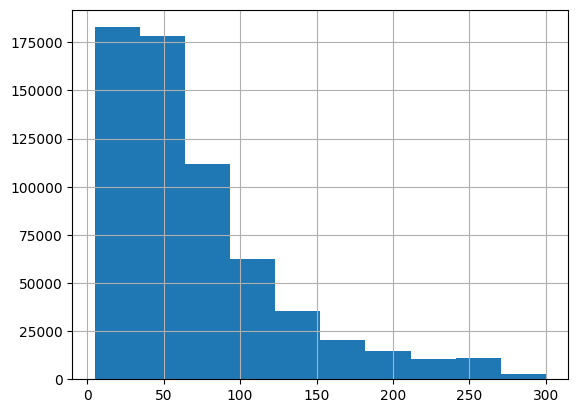

In [107]:
# Tamanho dos tweets
df["clean_text"].str.len().hist()

In [129]:
data = df["clean_text"].str.split().map(lambda x: len(x)).sor

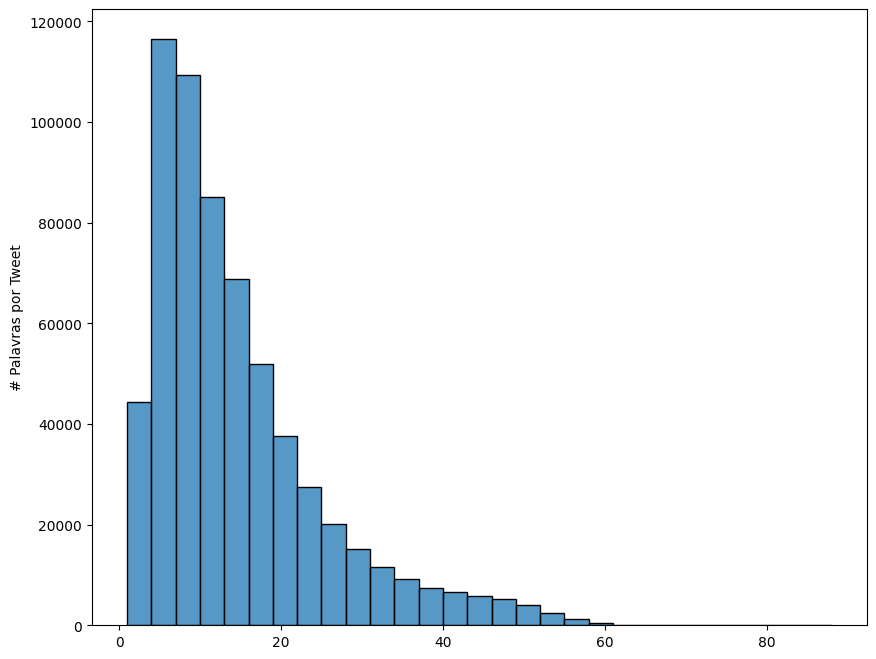

In [136]:
# number of words appearing in each tweet
# df["clean_text"].str.split().map(lambda x: len(x))
fig, ax = plt.subplots(figsize=(10, 8))


sns.histplot(
    x=data, binwidth=3, stat="count", ax=ax
)

ax.set_xlabel("")
ax.set_ylabel("# Palavras por Tweet")
plt.show()

In [109]:
import numpy as np

<Axes: >

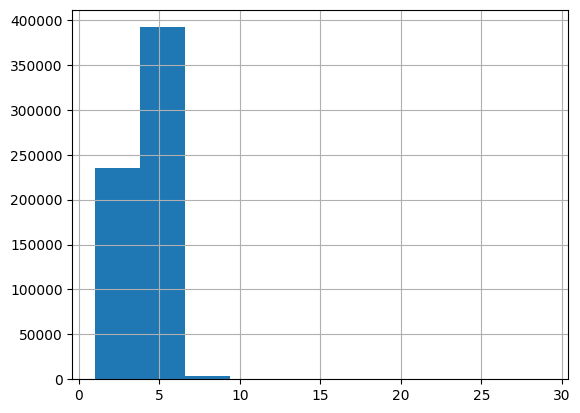

In [110]:
# avg word lenght
df["clean_text"].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [124]:
import seaborn as sns

<Axes: >

/home/baldoinov/Projetos/tweets-sentiment-analysis/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 120369 (\N{MATHEMATICAL SANS-SERIF ITALIC SMALL P}) missing from current font.
  func(*args, **kwargs)
/home/baldoinov/Projetos/tweets-sentiment-analysis/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 120368 (\N{MATHEMATICAL SANS-SERIF ITALIC SMALL O}) missing from current font.
  func(*args, **kwargs)
/home/baldoinov/Projetos/tweets-sentiment-analysis/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 120371 (\N{MATHEMATICAL SANS-SERIF ITALIC SMALL R}) missing from current font.
  func(*args, **kwargs)
/home/baldoinov/Projetos/tweets-sentiment-analysis/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 120366 (\N{MATHEMATICAL SANS-SERIF ITALIC SMALL M}) missing from current font.
  func(*args, **kwargs)
/home/baldoinov/Projetos/tweets-sentiment-analysis/.venv/lib

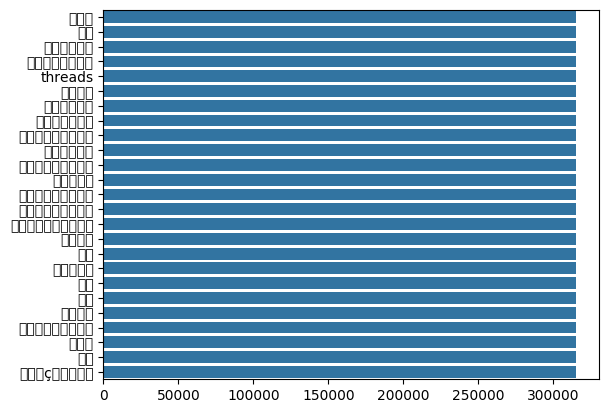

In [28]:
x = []
y = []
common = most_frequent_terms.most_common(50)

for word, c in common[25:]:
    x.append(word)
    y.append(c)


sns.barplot(x=y, y=x)

In [32]:
print(common)

[('𝟹𝟼𝟻', 315251), ('𝟐𝟕', 315250), ('𝟐𝟏', 315249), ('𝟐𝟎𝟔', 315248), ('𝟐𝟎𝟒', 315247), ('𝟐𝟎𝟑', 315246), ('𝟐𝟎𝟐', 315245), ('𝟏𝟗𝟔', 315244), ('𝟏𝟗', 315243), ('𝟏𝟒', 315242), ('𝟏𝟐', 315241), ('𝟏𝟎', 315240), ('𝟎𝟗', 315239), ('𝟎𝟖', 315238), ('𝟎𝟔', 315237), ('𝟎𝟒', 315236), ('𝟎𝟑', 315235), ('𝚠𝚎𝚕𝚌𝚘𝚖𝚎', 315234), ('𝚝𝚘', 315233), ('𝚜𝚎𝚌𝚛𝚎𝚝', 315232), ('𝚕𝚒𝚗𝚔', 315231), ('𝚔𝚎𝚢', 315230), ('𝙰𝚟𝚒𝚜𝚘𝚜', 315229), ('𝙉𝙊𝘼', 315228), ('𝘴𝘦𝘨𝘶𝘪𝘳', 315227), ('𝘱𝘰𝘳', 315226), ('𝘮𝘦', 315225), ('𝘧𝘰𝘳𝘺𝘰𝘶', 315224), ('𝘖𝘣𝘳𝘪𝘨𝘢𝘥𝘰', 315223), ('𝗍𝗁𝗋𝖾𝖺𝖽𝗌', 315222), ('𝓵𝓸𝓿𝓮', 315221), ('𝓵𝓸𝓪𝓭𝓮𝓭', 315220), ('𝓪𝓬𝓮𝓼𝓲𝓷𝓰', 315219), ('𝒗𝒐𝒄𝒂𝒍𝒊𝒔𝒕𝒂', 315218), ('𝒗𝒊𝒔𝒖𝒂𝒍', 315217), ('𝒔𝒖𝒏𝒇𝒍𝒐𝒘𝒆𝒓', 315216), ('𝒓𝒂𝒑𝒆𝒓', 315215), ('𝒑𝒓𝒊𝒏𝒄𝒊𝒑𝒂𝒍', 315214), ('𝒏𝒂𝒔𝒄𝒊𝒎𝒆𝒕𝒐', 315213), ('𝒏𝒂𝒔𝒄𝒊𝒎𝒆𝒏𝒕𝒐', 315212), ('𝒏𝒂𝒎𝒆', 315211), ('𝒎𝒚', 315210), ('𝒍𝒊𝒅𝒆𝒓', 315209), ('𝒍𝒊', 315208), ('𝒉𝒊', 315207), ('𝒈𝒖𝒊𝒂', 315206), ('𝒇𝒆𝒗𝒆𝒓𝒆𝒊𝒓𝒐', 315205), ('𝒅𝒆𝒓', 315204), ('𝒅𝒆', 315203), ('𝒅𝒂𝒏ç𝒂𝒓𝒊𝒏𝒐', 315202)]


In [53]:
common[1][0]

'𝟐𝟕'

In [58]:
import unicodedata

# Your weirdly formatted string
weird_string = common[1][0]

# Normalize the string to NFKC form
normalized_string = unicodedata.normalize("NFKC", weird_string)

# Now, you can convert it to an integer
regular_integer = int(normalized_string)

print(normalized_string)  # Output: 27

noticia comprado mano vai perder olha pesquisa trump vai ganhar cara acredita niso ganhar urna eletronica :)


In [ ]:
# Apresentar modelo com n-gram e depois apresentar o finetuning do modelo da hugging face
# Ajustar função de custo para penalizar erros na classe menos representada
# Under - oversmapling
# Realizar teste posterior com o dataset do cardniffnlp
# Como no @pysientimiento, realizar ajuste retirando o emoticon utilizado para query do texto

id2label = {0: "Neutro", 1: "Positivo", 2: "Negativo"}
label2id = {"Neutro": 0, "Positivo": 1, "Negativo": 2}

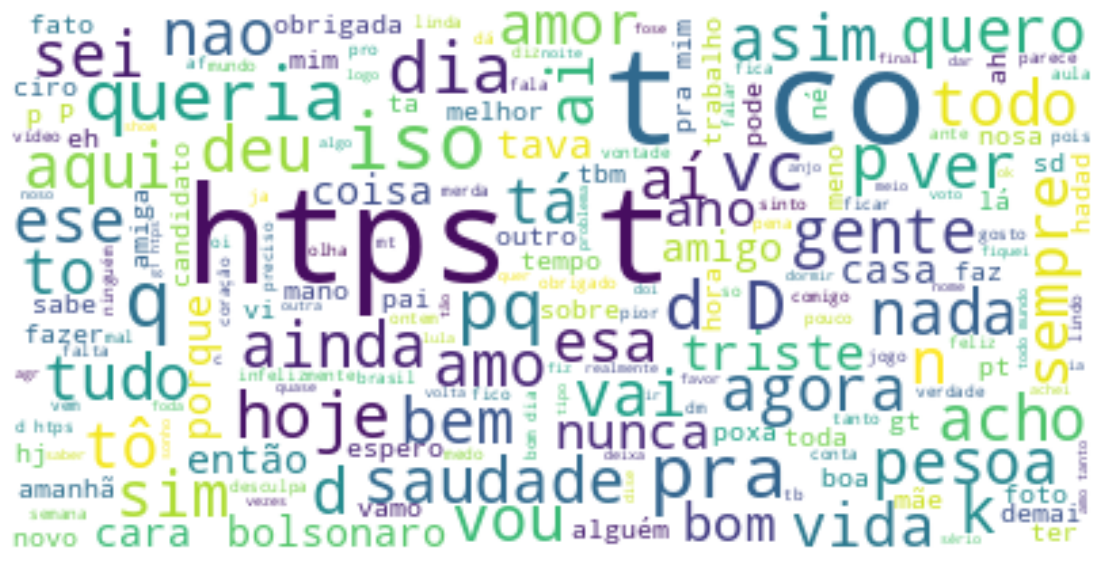

In [122]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(t for t in df["clean_text"][:100000])
wordcl = WordCloud(
    stopwords=stop, background_color="white", max_font_size=50, max_words=5000
).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation="bilinear")
plt.axis("off")
plt.show()